In [125]:
import numpy as np 
import random 
import scipy as sp 
from pandas import Series,DataFrame 
import pandas as pd 
import time 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import sklearn 

In [126]:
train_data = pd.read_csv('train.tsv',encoding='utf-8',delimiter = '\t')
test_data = pd.read_csv('test.tsv',encoding='utf-8',delimiter = '\t')

In [127]:
print(train_data.head())
print(test_data.head())
print(train_data.columns)

   id Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0   0   M   0.530     0.435   0.155        0.6990          0.2880   
1   3   F   0.710     0.565   0.195        1.8170          0.7850   
2   7   F   0.625     0.520   0.180        1.3540          0.4845   
3  12   M   0.375     0.280   0.095        0.2225          0.0875   
4  16   I   0.415     0.330   0.090        0.3595          0.1700   

   Viscera weight  Shell weight  Rings  
0          0.1595         0.205     10  
1          0.4920         0.490     11  
2          0.3510         0.375     11  
3          0.0430         0.080     10  
4          0.0810         0.090      6  
   id Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0   1   F   0.710     0.570   0.195        1.9805          0.9925   
1   2   F   0.485     0.395   0.160        0.6600          0.2475   
2   4   M   0.700     0.580   0.205        2.1300          0.7415   
3   5   F   0.670     0.525   0.190        1.5270          0.57

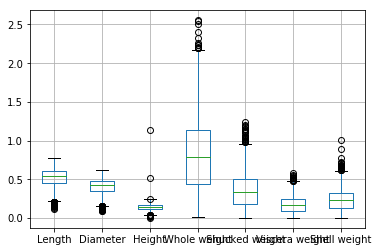

In [128]:
train_data[[ 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight']].boxplot()
plt.grid(True)

In [129]:
train_data.describe()

,id,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,2118.050766,0.521873,0.406557,0.139413,0.819116,0.355410,0.178227,0.237196,9.930077
std,1189.026152,0.121148,0.100285,0.044880,0.484888,0.218666,0.108274,0.139393,3.283578
min,0.000000,0.110000,0.090000,0.000000,0.008000,0.002500,0.002000,0.003000,2.000000
25%,1119.000000,0.450000,0.350000,0.115000,0.438875,0.184375,0.092000,0.130000,8.000000
50%,2142.500000,0.540000,0.420000,0.140000,0.791250,0.334000,0.168750,0.230250,9.000000
75%,3128.250000,0.610000,0.480000,0.165000,1.140125,0.497500,0.247500,0.325000,11.000000
max,4175.000000,0.780000,0.625000,1.130000,2.555000,1.245500,0.574500,1.005000,29.000000


In [130]:
test_data.describe()

,id,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000
mean,2057.963619,0.526111,0.409205,0.139619,0.838363,0.363323,0.182960,0.240465
std,1222.158982,0.119020,0.098190,0.038545,0.495756,0.225193,0.110913,0.139026
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,988.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.130000
50%,2030.000000,0.545000,0.425000,0.140000,0.806000,0.340000,0.171500,0.235000
75%,3141.000000,0.615000,0.480000,0.165000,1.168500,0.507000,0.257000,0.330000
max,4176.000000,0.815000,0.650000,0.250000,2.825500,1.488000,0.760000,0.897000


In [131]:
#線形回帰
from sklearn.linear_model import LinearRegression 

#決定木
from sklearn.tree import DecisionTreeRegressor 

#k-NN 
from sklearn.neighbors import KNeighborsRegressor

#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split 

from sklearn.svm import LinearSVC

X_train = train_data.drop(['Rings','id','Sex'],axis=1)
y_train = train_data['Rings']
X_test = test_data.drop(['id','Sex'],axis=1)

In [132]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 7 columns):
Length            2088 non-null float64
Diameter          2088 non-null float64
Height            2088 non-null float64
Whole weight      2088 non-null float64
Shucked weight    2088 non-null float64
Viscera weight    2088 non-null float64
Shell weight      2088 non-null float64
dtypes: float64(7)
memory usage: 114.3 KB


In [ ]:
X_train[]

In [133]:
#標準化のモジュール
from sklearn.preprocessing import StandardScaler 

#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_train_std,y_train)

In [136]:
for model in [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=i),RandomForestRegressor(),LinearSVC()]:
    fit_model = model.fit(X_train_std,y_train)
    
    print('Score_train:',fit_model.__class__.__name__,fit_model.score(X_train_new,y_train_new))
    print('Score_test:',fit_model.__class__.__name__,fit_model.score(X_test_new,y_test_new))

Score_train: LinearRegression 0.4883446542975253
Score_test: LinearRegression 0.5864524191431177
Score_train: DecisionTreeRegressor 1.0
Score_test: DecisionTreeRegressor 1.0
Score_train: KNeighborsRegressor 0.5991408486995715
Score_test: KNeighborsRegressor 0.6418643437838925


C:\Users\mkou0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score_train: RandomForestRegressor 0.9062532023332754
Score_test: RandomForestRegressor 0.909269455901184
Score_train: LinearSVC 0.2707535121328225
Score_test: LinearSVC 0.3160919540229885


C:\Users\mkou0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [137]:
model=RandomForestRegressor()
model.fit(X_train_std,y_train)

C:\Users\mkou0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [138]:
y_pred = model.predict(X_test)

In [139]:
y_pred = pd.DataFrame(y_pred)
result = pd.concat([test_data['id'],y_pred],axis=1)

In [140]:
result.to_csv('submit.csv',header=False,index=False)

TypeError: Passing a bool to header is invalid. Use header=None for no header or header=int or list-like of ints to specify the row(s) making up the column names

In [121]:
result_df.head()

,1,11.6
0,2,12.5
1,4,12.1
2,5,10.6
3,6,11.2
4,8,12.1
